# Chapter 10 - Problem 3

**3.** In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features.

**A.** Plot the observations.

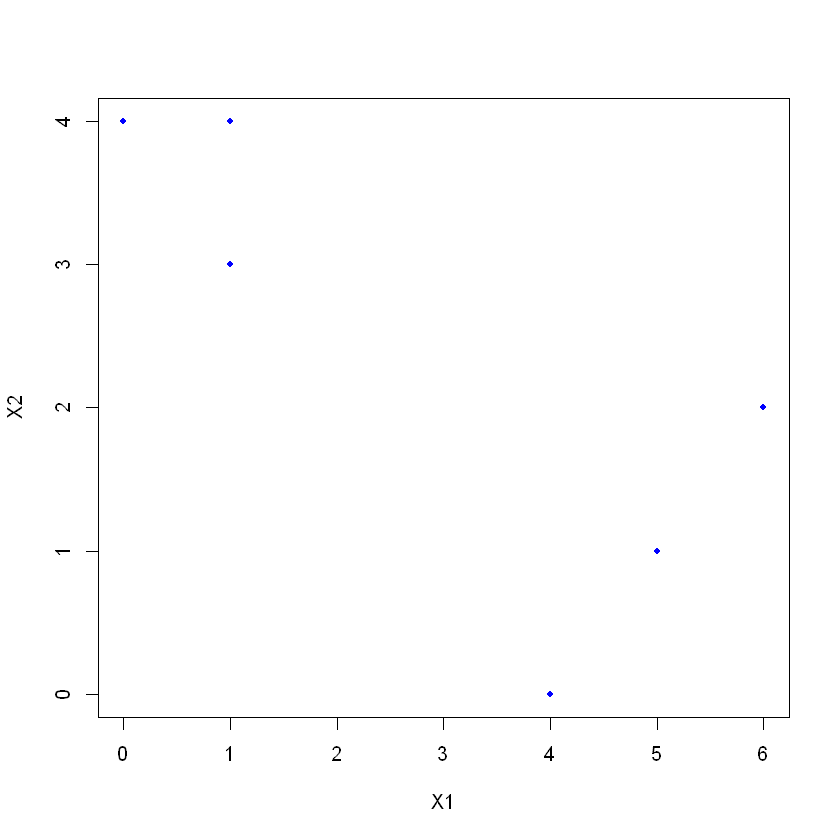

In [9]:
D <- data.frame(X1 = c(1,1,0,5,6,4), X2 = c(4,3,4,1,2,0))
print.D <- D
plot(D, type = 'p', pch = 20, col = "blue")

**B.** Randomly assign a cluster label to each observation. You can
use the sample() command in R to do this. Report the cluster
labels for each observation.

In [2]:
set.seed(2010)
label <- sample(1:2,nrow(D), replace = TRUE)

**C.** Compute the centroid for each cluster.

In [3]:
p <- 2
nc <- 2
centroid <- matrix(NA,nc,p)

for (c in 1:2){
    centroid[c,] <- apply(D[which(label == c),],2,mean)
}


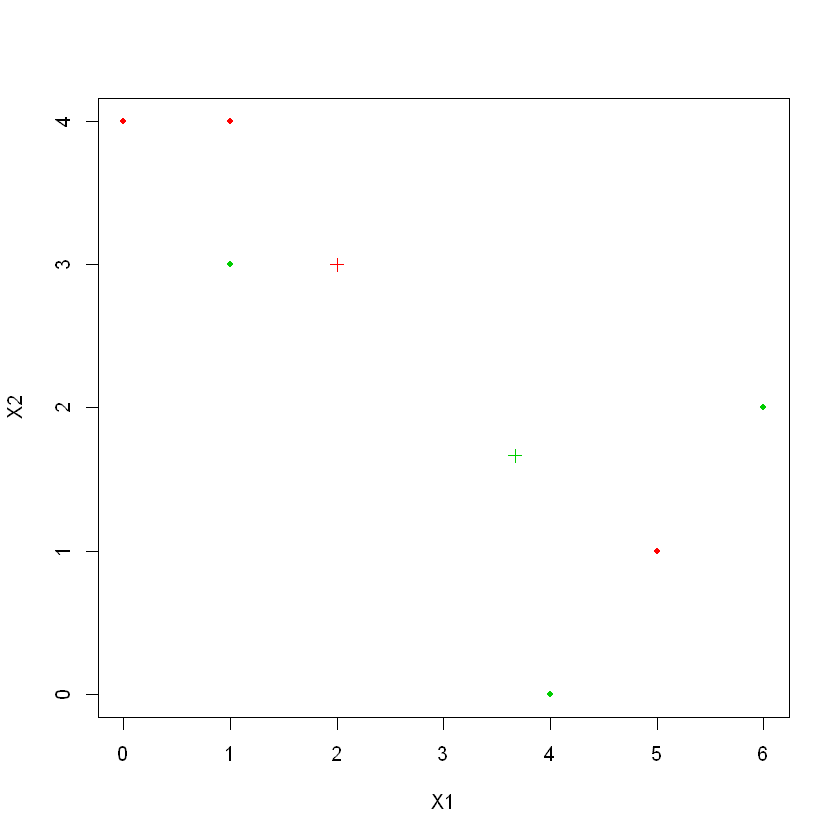

In [4]:
plot(D[,1:2], col=(label+1), pch=20)
points(centroid, col = c(2,3), pch=3)

**D.** Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.

In [5]:
euclid_dist <- function(point,centroid){
    
    #point and centroid must have the same number of features

    dist <- 0
    for (i in 1:ncol(point)){
        dist <- (point[i] - centroid[i])^2 + dist
    } 
    
    return(dist)
}

closest <- function(points, centroids){
    
    nc <- ncol(centroids)
    np <- nrow(points)

    distances <- data.frame(matrix(NA,p,nc))
    colnames(distances) <- seq(1,nc)
    
    for (p in 1:np){
        for (i in 1:nc){
            distances[p,i] <- euclid_dist(points[p,],centroids[i,])
        }
    }
    
    mins <- colnames(distances)[apply(distances,1,which.min)]
    
    return(mins)
}

In [13]:
new_label <- as.numeric(closest(D,centroid)) 

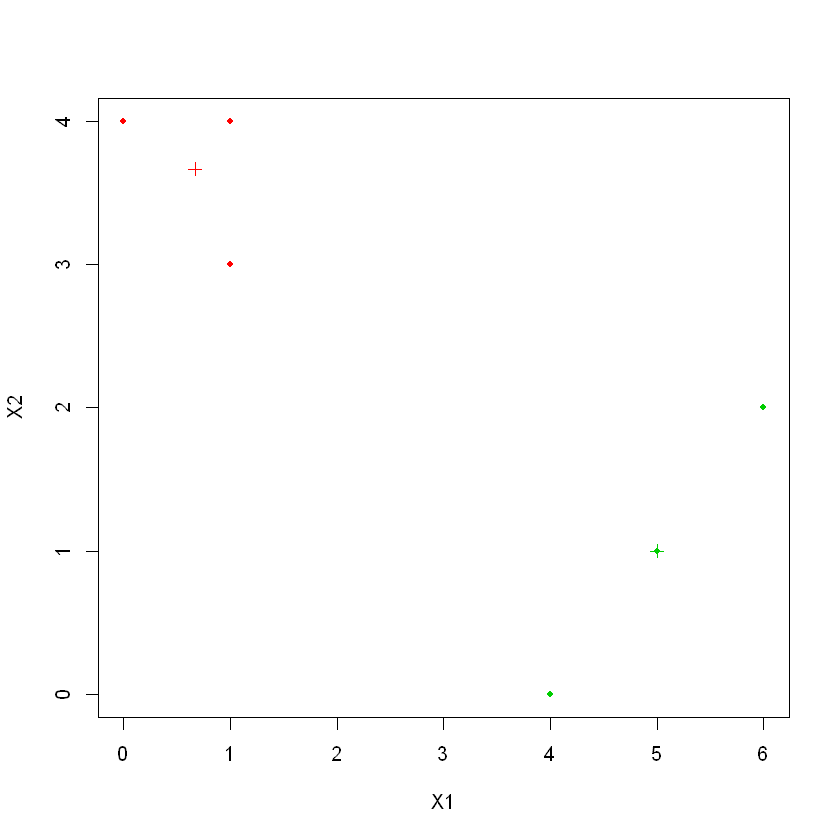

In [14]:
plot(D[,1:2], col=(new_label+1), pch=20)
points(centroid, col = c(2,3), pch=3)

**E.** Repeat (c) and (d) until the answers obtained stop changing.

In [15]:
while (!all(new_label == label)) {
  label <- new_label
    
    for (c in 1:2){
        centroid[c,] <- apply(D[which(label == c),],2,mean)
    }
    new_label <- as.numeric(closest(D,centroid)) 
}


**F.** In your plot from (a), color the observations according to the
cluster labels obtained.

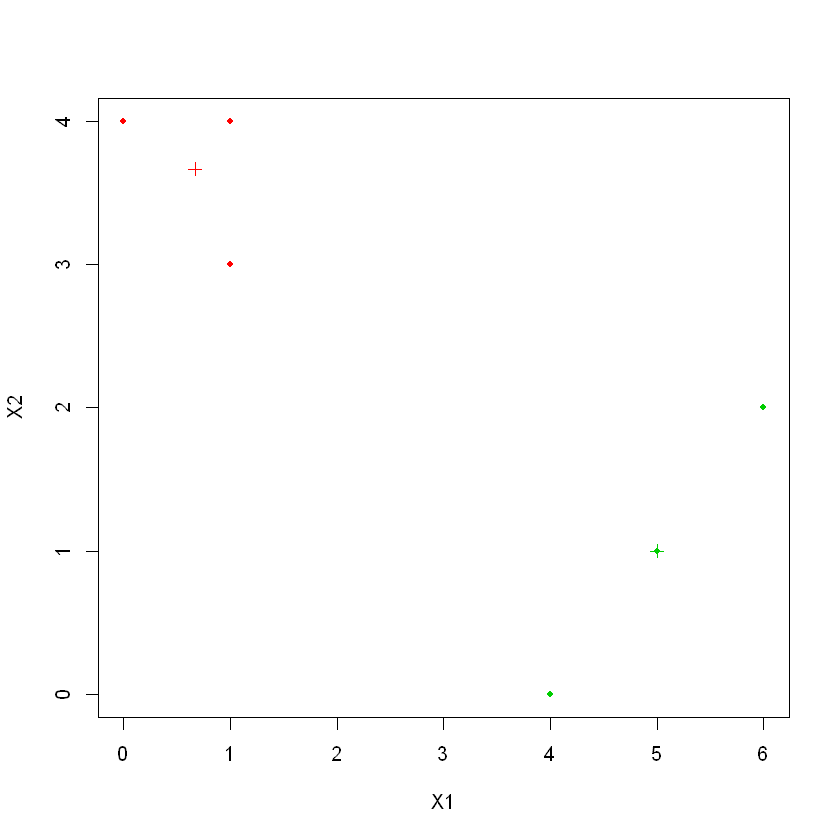

In [17]:
plot(D[,1:2], col=(new_label+1), pch=20)
points(centroid, col = c(2,3), pch=3)